#  Thu thập và xử lý data

In [34]:
import cv2
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [14]:
def crop (img_path,a,k):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(image, 10, 250)

    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    idx = 0

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if w > 10 and h> 10:
            idx+=1
            new_img=image[y-10:y+h+10,x-10:x+w+10]
            cv2.imwrite("C://Users//ADMIN//Pictures//rawdata_croped//raw_{}//1_{}{}_".format(a,k,a) + str(idx) + '.png', new_img)
    cv2.imshow("im",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    

In [ ]:
# crop image and store in each conrresponding folder
for i in range (10):
    for j in range (0,5):
        img =  cv2.imread("C://Users//ADMIN//Pictures//RAW_DATA_number//{}//{}_{}.jpg".format(i,i,j)) 
        crop (img, j,i)

In [11]:
# get list folder and path 
def get_list_path (path,x):
    list_path= []
    for i in range (10):
#         list_path.append("C://Users//ADMIN//Pictures//rawdata_croped//raw_{}".format(i))
        list_path.append(path + "//{}{}".format(x,i))
    return list_path


In [12]:
# get list file in each folder from list path
def get_list_file(list_path):
    list_file = []
    for i in range (len(list_path)):
        for j in range (200):
            list_file.append(list_path[i] + "//{}_{}.png".format(i,j))
    return list_file


In [13]:
def resize (img):
    new_width = 28
    new_height = 28
    img_resized = cv2.resize(src=img, dsize=(new_width, new_height))
    return img_resized   


In [4]:
# convert to binary
def cv_to_binary(img_path):
    # read color image with grayscale flag: "cv2.IMREAD_GRAYSCALE"
    
    img_grayscale = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # shape: (960, 960)
    img_binary = cv2.adaptiveThreshold(img_grayscale, 
                                       maxValue=255, 
                                       adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
                                       thresholdType=cv2.THRESH_BINARY_INV,
                                       blockSize=15,
                                       C=8)
    return img_binary

## List folder

In [151]:
# list data croped folder
path = "C://Users//ADMIN//Pictures//rawdata_croped"
list_path = get_list_path (path,"raw_")
list_path

['C://Users//ADMIN//Pictures//rawdata_croped//raw_0',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_1',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_2',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_3',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_4',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_5',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_6',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_7',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_8',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_9']

## List file

In [152]:
# list file image from  rawdata_croped folder
list_file = get_list_file(list_path)
len(list_file)
list_file [::200]

['C://Users//ADMIN//Pictures//rawdata_croped//raw_0//0_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_1//1_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_2//2_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_3//3_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_4//4_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_5//5_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_6//6_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_7//7_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_8//8_0.png',
 'C://Users//ADMIN//Pictures//rawdata_croped//raw_9//9_0.png']

# resize image

In [153]:
# resize image
j = 0 
for i in range (len(list_file)):
    # load image from path 
    img = cv2.imread(list_file[i])
    img_resized = resize(img)
#     cv2.imwrite(list_path[i],img_resized)
    if (i+1) % 200==0:
        j=j+1
    cv2.imwrite('C://Users//ADMIN//Pictures//rawdata_resized//{}//{}_{}.png'.format(j,j,i%200),img_resized)

## List folder (resized) 

In [154]:
# list rawdata_croped folder
path =  "C://Users//ADMIN//Pictures//rawdata_resized"
list_path = get_list_path(path,"")
list_path

['C://Users//ADMIN//Pictures//rawdata_resized//0',
 'C://Users//ADMIN//Pictures//rawdata_resized//1',
 'C://Users//ADMIN//Pictures//rawdata_resized//2',
 'C://Users//ADMIN//Pictures//rawdata_resized//3',
 'C://Users//ADMIN//Pictures//rawdata_resized//4',
 'C://Users//ADMIN//Pictures//rawdata_resized//5',
 'C://Users//ADMIN//Pictures//rawdata_resized//6',
 'C://Users//ADMIN//Pictures//rawdata_resized//7',
 'C://Users//ADMIN//Pictures//rawdata_resized//8',
 'C://Users//ADMIN//Pictures//rawdata_resized//9']

## List file (resized) 

In [155]:
# list file image from  rawdata_resized folder
list_file = get_list_file(list_path)
len(list_file)
list_file [::200]

['C://Users//ADMIN//Pictures//rawdata_resized//0//0_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//1//1_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//2//2_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//3//3_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//4//4_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//5//5_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//6//6_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//7//7_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//8//8_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//9//9_0.png']

## Convert to binary image 

In [ ]:

j = 0 
for i in range (len(list_file)):
    # load image from path 
    img = cv2.imread(list_file[i])
    img_binary = resize(list_file[i])
    if (i+1) % 200==0:
        j=j+1
     # save in .png format   
    cv2.imwrite('C://Users//ADMIN//Pictures//DATASET//{}//{}_{}.png'.format(j,j,i%200),img_binary)

## Vectorization

In [1]:
def cv_to_vector (img):
    vec = []
    for i in range (len(img[0])):
        for j in range (len(img[1])):
            vec.append(img[i][j])
    return vec

In [2]:
def output1 (img):
    for i in range (len(img[0])):
        for j in range (len(img[1])):
            if img[i][j] ==0:
                print (" {} ".format(img[i][j]),end="")
            else:
                print ("{}".format(img[i][j]),end="")
        print ("")

#### Test thử với 1 tấm ảnh 

In [24]:
path1= "C://Users//ADMIN//Pictures//rawdata_resized//0//0_0.png"


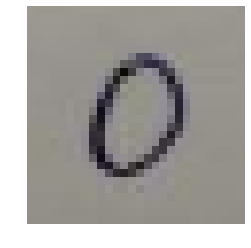

In [23]:
img = mpimg.imread(path1)
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#### ảnh sau khi chuyển về nhị phân 

In [7]:
img_b1 = cv_to_binary(path1)
output1(img_b1)

 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0 255255255255 0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0 255255255255255255 0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0 255255255 0  0  0 255255 0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 255255255 0  0  0  0 255255255 0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 255255 0  0  0  0  0  0 255255 0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0 255255255 0  0  0  0  0  0 255255 0  0

#### chuyển ảnh về vector 

In [9]:
vec = cv_to_vector(img_b1)

print (len(vec))
print (vec)

784
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Thực hiện với toàn bộ dữ liệu 

In [15]:
path = "C://Users//ADMIN//Pictures//rawdata_resized"
list_path = get_list_path (path, "")
list_path

['C://Users//ADMIN//Pictures//rawdata_resized//0',
 'C://Users//ADMIN//Pictures//rawdata_resized//1',
 'C://Users//ADMIN//Pictures//rawdata_resized//2',
 'C://Users//ADMIN//Pictures//rawdata_resized//3',
 'C://Users//ADMIN//Pictures//rawdata_resized//4',
 'C://Users//ADMIN//Pictures//rawdata_resized//5',
 'C://Users//ADMIN//Pictures//rawdata_resized//6',
 'C://Users//ADMIN//Pictures//rawdata_resized//7',
 'C://Users//ADMIN//Pictures//rawdata_resized//8',
 'C://Users//ADMIN//Pictures//rawdata_resized//9']

In [29]:
list_file = get_list_file (list_path)

print (len (list_file))
list_file[::200]

2000


['C://Users//ADMIN//Pictures//rawdata_resized//0//0_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//1//1_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//2//2_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//3//3_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//4//4_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//5//5_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//6//6_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//7//7_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//8//8_0.png',
 'C://Users//ADMIN//Pictures//rawdata_resized//9//9_0.png']

In [32]:
vect_img= []
for i in range (len(list_file)):
    img = cv_to_binary (list_file[i])
    vec = cv_to_vector (img)
    vect_img.append(vec)
    
print (len(vect_img))

2000


### Gắn nhãn 

In [33]:
labels= [ int(i/200) for i in range (2000) ]
labels[::200]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
s1 = {'label': pd.Series(labels)}
s1= pd.DataFrame(s1)
#  'images': pd.Series(vect_img)}
for i in range (1,29):
    for j in range (1,29):
        temp = '{}x{}'.format(i,j)
        s1[temp]= vect_img[i][j]
        
data = s1.sample(frac=1).reset_index(drop=True)
data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lưu ra file csv

In [ ]:
export_csv= data.to_csv(r'C://Users//ADMIN//Pictures//DATASET//data.csv', index = None, header=True)